Luggage Bags Cost Prediction

# Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

# Get the Data
We'll work with the Luggage Bags Cost Prediction data csv file It has cost weight length height width color ** Read in the Luggage Bags Cost Prediction csv file as a DataFrame called df

In [2]:
df = pd.read_csv("AIML_C7_April 2022_Data_miniproject.csv")
df.columns

df.head()
print(df)

      Cost Weight Weight1 Length   Height   Width   Color
0    242.0   23.2    25.4     30  11.5200    4.02   Green
1    290.0     24    26.3   31.2  12.4800  4.3056     Red
2    340.0   23.9    26.5   31.1  12.3778  4.6961  Yellow
3    363.0   26.3      29   33.5  12.7300  4.4555   Green
4    430.0   26.5      29  34.25  12.4440   5.134     Red
..     ...    ...     ...    ...      ...     ...     ...
154   12.2   11.5    12.2   13.4   2.0904  1.3936     Red
155   13.4   11.7    12.4   13.5   2.4300   1.269  Yellow
156   12.2   12.1      13   13.8   2.2770  1.2558   Green
157   19.7   13.2    14.3   15.2   2.8728  2.0672     Red
158   19.9   13.8      15   16.2   2.9322  1.8792  Yellow

[159 rows x 7 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Cost       159 non-null float64
Weight     159 non-null object
Weight1    159 non-null object
Length     159 non-null object
Height     158 non-null float64
Width      158 non-null object
Color      159 non-null object
dtypes: float64(2), object(5)
memory usage: 8.8+ KB


In [4]:
# Generate descriptive statistics.
# Checking Min, Max, Mean, Std for all the columns
df.describe(percentiles=[.10, .25, .5, .75])

,Cost,Height
count,159.000000,158.000000
mean,398.326415,8.933124
std,357.978317,4.273069
min,0.000000,1.728400
10%,29.580000,3.735200
25%,120.000000,5.940600
50%,273.000000,7.733000
75%,650.000000,12.248700
max,1650.000000,18.957000


# Analyse the dataset and do EDA (Exploratory Data Analysis) 

In [5]:
# checking column wise null values
df.isnull().any()

Cost       False
Weight     False
Weight1    False
Length     False
Height      True
Width       True
Color      False
dtype: bool

In [6]:
# checking column wise null value count
df.isnull().any()
df.isnull().sum()

Cost       0
Weight     0
Weight1    0
Length     0
Height     1
Width      1
Color      0
dtype: int64

In [7]:
# checking overall null value count
df.isnull().sum().sum()

2

In [8]:
df = df.dropna(how='any',axis=0)
print(df)

      Cost Weight Weight1 Length   Height   Width   Color
0    242.0   23.2    25.4     30  11.5200    4.02   Green
1    290.0     24    26.3   31.2  12.4800  4.3056     Red
2    340.0   23.9    26.5   31.1  12.3778  4.6961  Yellow
3    363.0   26.3      29   33.5  12.7300  4.4555   Green
4    430.0   26.5      29  34.25  12.4440   5.134     Red
..     ...    ...     ...    ...      ...     ...     ...
154   12.2   11.5    12.2   13.4   2.0904  1.3936     Red
155   13.4   11.7    12.4   13.5   2.4300   1.269  Yellow
156   12.2   12.1      13   13.8   2.2770  1.2558   Green
157   19.7   13.2    14.3   15.2   2.8728  2.0672     Red
158   19.9   13.8      15   16.2   2.9322  1.8792  Yellow

[157 rows x 7 columns]


In [9]:
# checking overall null value count
df.isnull().sum().sum()

0

# Now we can see all null value is removed

# Checking for Special Chars in various coloumns

In [10]:
# Checking for special char in Weight coloumn
print(df[df.Weight.str.contains(r'[U#&$]')])


     Cost Weight  Weight1 Length   Height   Width  Color
9   500.0      #  30.15.7   36.2  14.2266  4.9594  Green
49  161.0      &     23.4   26.7   6.9153  3.6312    Red


In [11]:
# Checking for special char in Length coloumn
print(df[df.Length.str.contains(r'[U#&$]')])



     Cost Weight Weight1 Length  Height   Width   Color
56  270.0   24.1    26.5      $  8.1454  4.2485  Yellow


In [12]:
# Checking for special char in Width coloumn
print(df[df.Width.str.contains(r'[U#&$]')])

    Cost Weight Weight1   Length   Height Width   Color
5  450.0   26.8      29  34.25.7  13.6024     U  Yellow


In [13]:
print(df)

      Cost Weight Weight1 Length   Height   Width   Color
0    242.0   23.2    25.4     30  11.5200    4.02   Green
1    290.0     24    26.3   31.2  12.4800  4.3056     Red
2    340.0   23.9    26.5   31.1  12.3778  4.6961  Yellow
3    363.0   26.3      29   33.5  12.7300  4.4555   Green
4    430.0   26.5      29  34.25  12.4440   5.134     Red
..     ...    ...     ...    ...      ...     ...     ...
154   12.2   11.5    12.2   13.4   2.0904  1.3936     Red
155   13.4   11.7    12.4   13.5   2.4300   1.269  Yellow
156   12.2   12.1      13   13.8   2.2770  1.2558   Green
157   19.7   13.2    14.3   15.2   2.8728  2.0672     Red
158   19.9   13.8      15   16.2   2.9322  1.8792  Yellow

[157 rows x 7 columns]


# Dropping All Special Characters from coloumns

In [14]:

print(df.drop(df[df.Weight.str.contains(r'[U#&$]') | df.Width.str.contains(r'[U#&$]') 
                 | df.Length.str.contains(r'[U#&$]')].index))


      Cost Weight Weight1 Length   Height   Width   Color
0    242.0   23.2    25.4     30  11.5200    4.02   Green
1    290.0     24    26.3   31.2  12.4800  4.3056     Red
2    340.0   23.9    26.5   31.1  12.3778  4.6961  Yellow
3    363.0   26.3      29   33.5  12.7300  4.4555   Green
4    430.0   26.5      29  34.25  12.4440   5.134     Red
..     ...    ...     ...    ...      ...     ...     ...
154   12.2   11.5    12.2   13.4   2.0904  1.3936     Red
155   13.4   11.7    12.4   13.5   2.4300   1.269  Yellow
156   12.2   12.1      13   13.8   2.2770  1.2558   Green
157   19.7   13.2    14.3   15.2   2.8728  2.0672     Red
158   19.9   13.8      15   16.2   2.9322  1.8792  Yellow

[153 rows x 7 columns]


# convert to numeric

In [15]:
df[df.columns[0:6]]=df[df.columns[0:6]].apply(pd.to_numeric, errors='coerce')
print(df)

      Cost  Weight  Weight1  Length   Height   Width   Color
0    242.0    23.2     25.4   30.00  11.5200  4.0200   Green
1    290.0    24.0     26.3   31.20  12.4800  4.3056     Red
2    340.0    23.9     26.5   31.10  12.3778  4.6961  Yellow
3    363.0    26.3     29.0   33.50  12.7300  4.4555   Green
4    430.0    26.5     29.0   34.25  12.4440  5.1340     Red
..     ...     ...      ...     ...      ...     ...     ...
154   12.2    11.5     12.2   13.40   2.0904  1.3936     Red
155   13.4    11.7     12.4   13.50   2.4300  1.2690  Yellow
156   12.2    12.1     13.0   13.80   2.2770  1.2558   Green
157   19.7    13.2     14.3   15.20   2.8728  2.0672     Red
158   19.9    13.8     15.0   16.20   2.9322  1.8792  Yellow

[157 rows x 7 columns]


# Checking for Duplicates data

In [16]:
df=df.drop_duplicates()
df.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,157.000000,155.000000,154.000000,153.000000,157.000000,156.000000
mean,399.517197,26.341935,28.434091,31.263725,8.976036,3850.543321
std,358.554199,10.033443,10.783528,11.714135,4.252453,48038.092464
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.100000,5.953200,3.390675
50%,273.000000,25.200000,26.750000,29.200000,7.786000,4.248050
75%,650.000000,32.750000,36.000000,39.800000,12.354000,5.623650
max,1650.000000,59.000000,63.400000,68.000000,18.957000,600000.000000


# Outlier Detection and its importance:

Generating the box-plots to identify outliers:

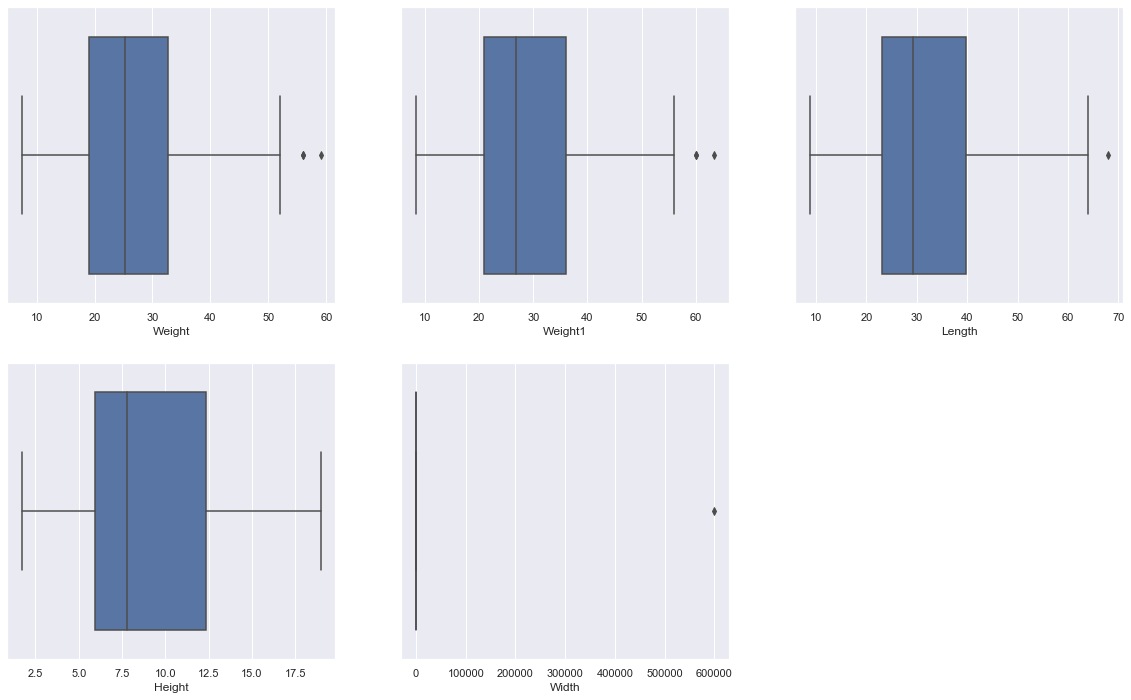

In [17]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(df['Weight'])
plt.subplot(2,3,2)
sns.boxplot(df['Weight1'])
plt.subplot(2,3,3)
sns.boxplot(df['Length'])
plt.subplot(2,3,4)
sns.boxplot(df['Height'])
plt.subplot(2,3,5)
sns.boxplot(df['Width'])
plt.show()



Above box plot showing the outliers

# Removing the Outlier

In [18]:
df[(df['Weight'] >= 55)&(df['Length']>=64)]
df.drop(df[(df['Weight'] >= 55)&(df['Length']>=64)].index, inplace=True)
df.shape

(154, 7)

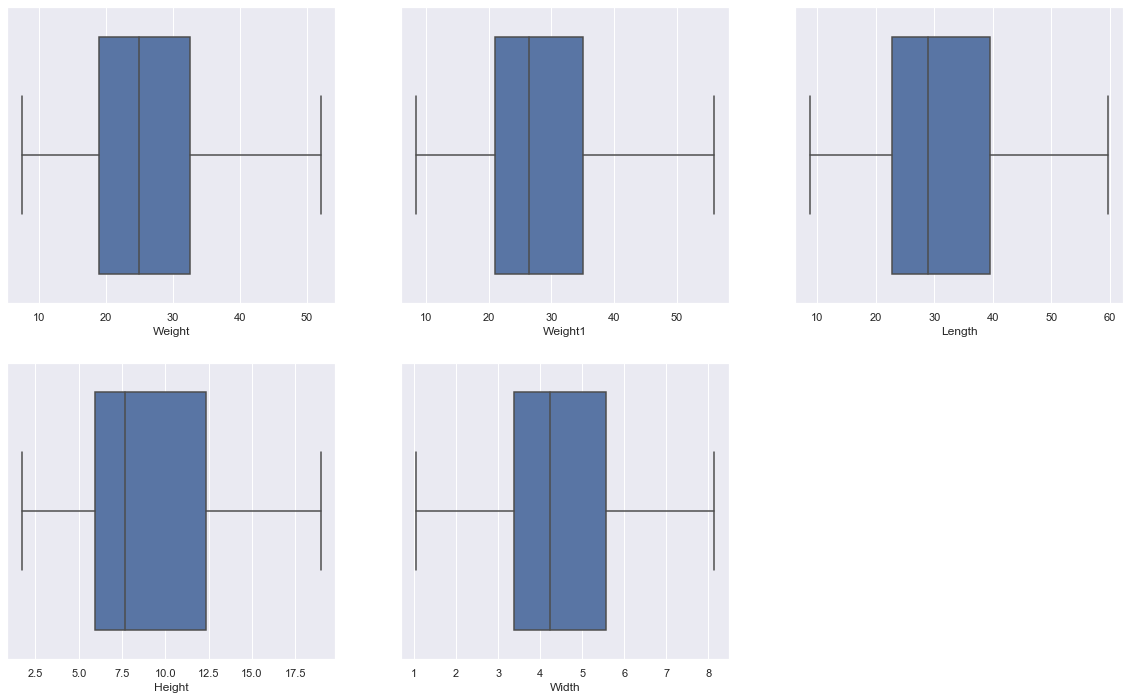

In [19]:
#Generating the box plots to validate the presence of outliers after the previous step
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(df['Weight'])
plt.subplot(2,3,2)
sns.boxplot(df['Weight1'])
plt.subplot(2,3,3)
sns.boxplot(df['Length'])
plt.subplot(2,3,4)
sns.boxplot(df['Height'])
plt.subplot(2,3,5)
sns.boxplot(df['Width'])
plt.show()



In [20]:
#Removing Outliers
# From the descriptive statistics, cost min is 0, so checking how many cost rows are zero
df[df['Cost']==0]

,Cost,Weight,Weight1,Length,Height,Width,Color
40,0.0,19.0,20.5,22.8,6.4752,3.3516,Red


In [21]:
# Removing rows where cost is 0.
df.drop(df[df['Cost']==0].index,inplace=True)
print(df)

      Cost  Weight  Weight1  Length   Height   Width   Color
0    242.0    23.2     25.4   30.00  11.5200  4.0200   Green
1    290.0    24.0     26.3   31.20  12.4800  4.3056     Red
2    340.0    23.9     26.5   31.10  12.3778  4.6961  Yellow
3    363.0    26.3     29.0   33.50  12.7300  4.4555   Green
4    430.0    26.5     29.0   34.25  12.4440  5.1340     Red
..     ...     ...      ...     ...      ...     ...     ...
154   12.2    11.5     12.2   13.40   2.0904  1.3936     Red
155   13.4    11.7     12.4   13.50   2.4300  1.2690  Yellow
156   12.2    12.1     13.0   13.80   2.2770  1.2558   Green
157   19.7    13.2     14.3   15.20   2.8728  2.0672     Red
158   19.9    13.8     15.0   16.20   2.9322  1.8792  Yellow

[153 rows x 7 columns]


In [22]:
df['Color'].replace(['Green','Red','Yellow'],[0,1,2],inplace=True)
print(df)

      Cost  Weight  Weight1  Length   Height   Width  Color
0    242.0    23.2     25.4   30.00  11.5200  4.0200      0
1    290.0    24.0     26.3   31.20  12.4800  4.3056      1
2    340.0    23.9     26.5   31.10  12.3778  4.6961      2
3    363.0    26.3     29.0   33.50  12.7300  4.4555      0
4    430.0    26.5     29.0   34.25  12.4440  5.1340      1
..     ...     ...      ...     ...      ...     ...    ...
154   12.2    11.5     12.2   13.40   2.0904  1.3936      1
155   13.4    11.7     12.4   13.50   2.4300  1.2690      2
156   12.2    12.1     13.0   13.80   2.2770  1.2558      0
157   19.7    13.2     14.3   15.20   2.8728  2.0672      1
158   19.9    13.8     15.0   16.20   2.9322  1.8792      2

[153 rows x 7 columns]


In [23]:
#data = normalize(data, axis=0)
# Scaling the features by using min max scaling
minmax_scale = preprocessing.MinMaxScaler().fit(df.iloc[:,1:])
df.iloc[:,1:] = minmax_scale.transform(df.iloc[:,1:])
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 158
Data columns (total 7 columns):
Cost       153 non-null float64
Weight     151 non-null float64
Weight1    150 non-null float64
Length     149 non-null float64
Height     153 non-null float64
Width      152 non-null float64
Color      153 non-null float64
dtypes: float64(7)
memory usage: 9.6 KB


      Cost    Weight   Weight1    Length    Height     Width  Color
0    242.0  0.352809  0.357143  0.416503  0.568334  0.418978    0.0
1    290.0  0.370787  0.376050  0.440079  0.624055  0.459235    0.5
2    340.0  0.368539  0.380252  0.438114  0.618123  0.514279    1.0
3    363.0  0.422472  0.432773  0.485265  0.638566  0.480365    0.0
4    430.0  0.426966  0.432773  0.500000  0.621966  0.576004    0.5
..     ...       ...       ...       ...       ...       ...    ...
154   12.2  0.089888  0.079832  0.090373  0.021012  0.048771    0.5
155   13.4  0.094382  0.084034  0.092338  0.040723  0.031208    1.0
156   12.2  0.103371  0.096639  0.098232  0.031842  0.029347    0.0
157   19.7  0.128090  0.123950  0.125737  0.066424  0.143719    0.5
158   19.9  0.141573  0.138655  0.145383  0.069872  0.117219    1.0

[146 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 158
Data columns (total 7 columns):
Cost       146 non-null float64
Weight     146 non-null 

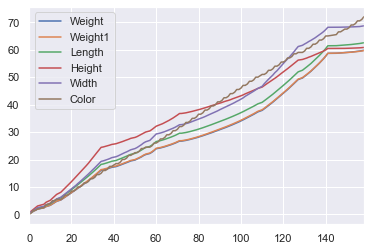

In [24]:
df["Weight"]=df["Weight"].apply(pd.to_numeric, errors='coerce',downcast="float")
df["Weight1"]=df["Weight1"].apply(pd.to_numeric, errors='coerce',downcast="float")
df["Length"]=df["Length"].apply(pd.to_numeric, errors='coerce',downcast="float")
df["Height"]=df["Height"].apply(pd.to_numeric, errors='coerce',downcast="float")
df["Width"]=df["Width"].apply(pd.to_numeric, errors='coerce',downcast="float")
df=df.dropna()
print(df)
df.info()
df.drop('Cost',axis=1).cumsum().plot()

# Various Plots

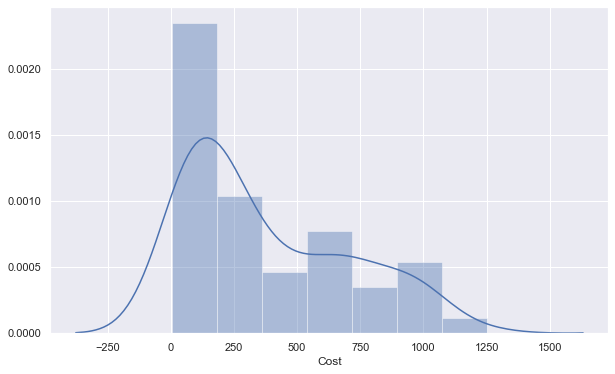

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(df['Cost'])     #Understanding where cost lies

We can see that the cost mostly lies between 0–1000 and the number of bags having cost higher is gradually decreasing as the price is increasing.

# Understanding the influence of each of the metrics on cost



# Influence of Weight on Cost:

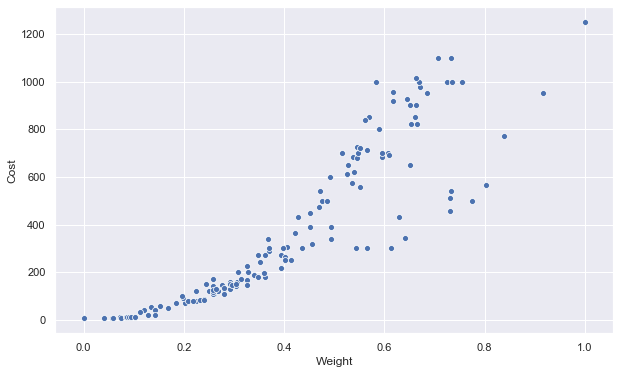

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['Weight'],df['Cost'])    

In [27]:
#By seeing the graph we can see still there is ssome outliers hence dropping certain weight

      Cost    Weight   Weight1    Length    Height     Width  Color
0    242.0  0.352809  0.357143  0.416503  0.568334  0.418978    0.0
1    290.0  0.370787  0.376050  0.440079  0.624055  0.459235    0.5
2    340.0  0.368539  0.380252  0.438114  0.618123  0.514279    1.0
3    363.0  0.422472  0.432773  0.485265  0.638566  0.480365    0.0
4    430.0  0.426966  0.432773  0.500000  0.621966  0.576004    0.5
..     ...       ...       ...       ...       ...       ...    ...
154   12.2  0.089888  0.079832  0.090373  0.021012  0.048771    0.5
155   13.4  0.094382  0.084034  0.092338  0.040723  0.031208    1.0
156   12.2  0.103371  0.096639  0.098232  0.031842  0.029347    0.0
157   19.7  0.128090  0.123950  0.125737  0.066424  0.143719    0.5
158   19.9  0.141573  0.138655  0.145383  0.069872  0.117219    1.0

[145 rows x 7 columns]


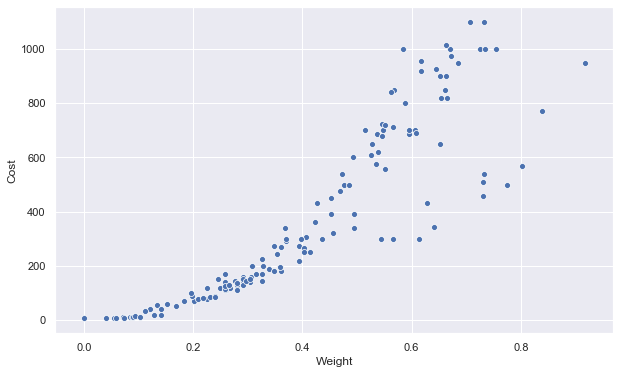

In [28]:
df.drop(df[df['Cost']>=1200].index,inplace=True)
print(df)

plt.figure(figsize=(10,6))
sns.scatterplot(df['Weight'],df['Cost']) 

# Influence of Length on Cost:

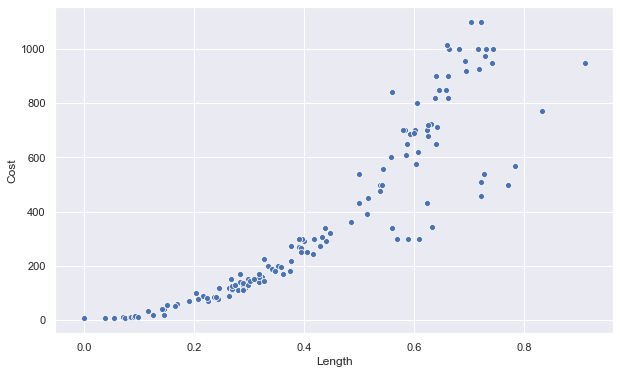

In [29]:

plt.figure(figsize=(10,6))
sns.scatterplot(df['Length'],df['Cost'])    

# Influence of Height  on Cost:

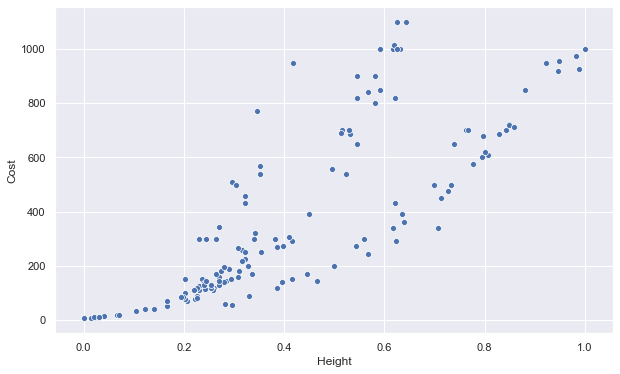

In [30]:

    plt.figure(figsize=(10,6))
sns.scatterplot(df['Height'],df['Cost'])    

# Influence of Width  on Cost:

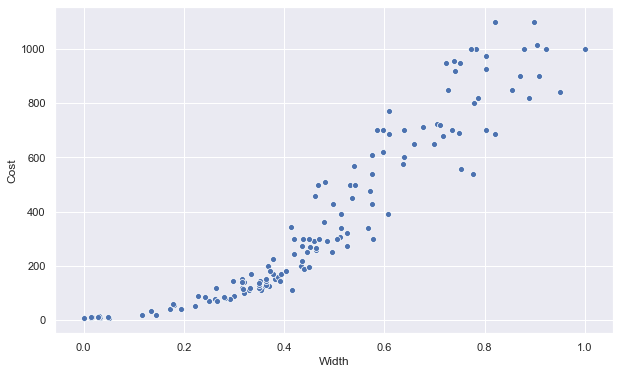

In [31]:

plt.figure(figsize=(10,6))
sns.scatterplot(df['Width'],df['Cost'])    

# Influence of Weight  on Cost:

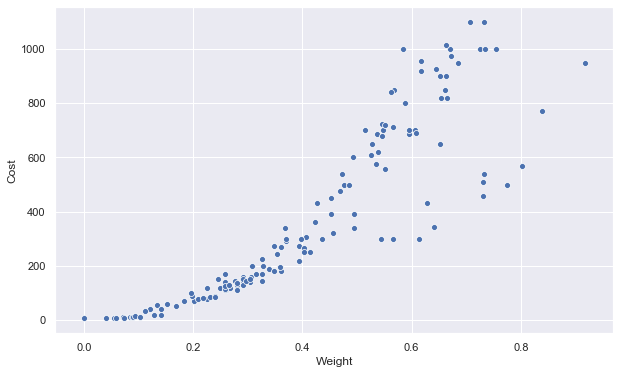

In [32]:

    plt.figure(figsize=(10,6))
sns.scatterplot(df['Weight'],df['Cost'])    

# Influence of Weight1  on Cost:

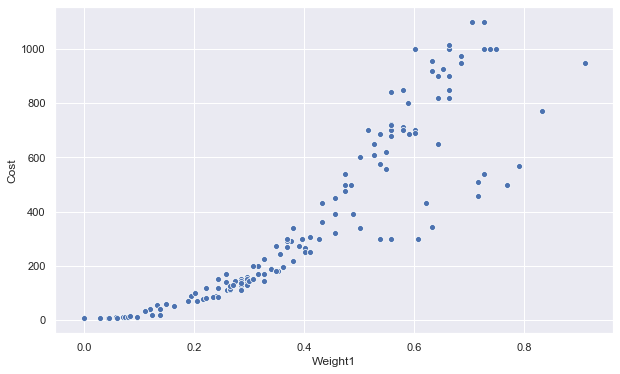

In [33]:

    plt.figure(figsize=(10,6))
sns.scatterplot(df['Weight1'],df['Cost'])    

# Understanding the influence of each of these attributes on the other:

Looking at the pair plots:

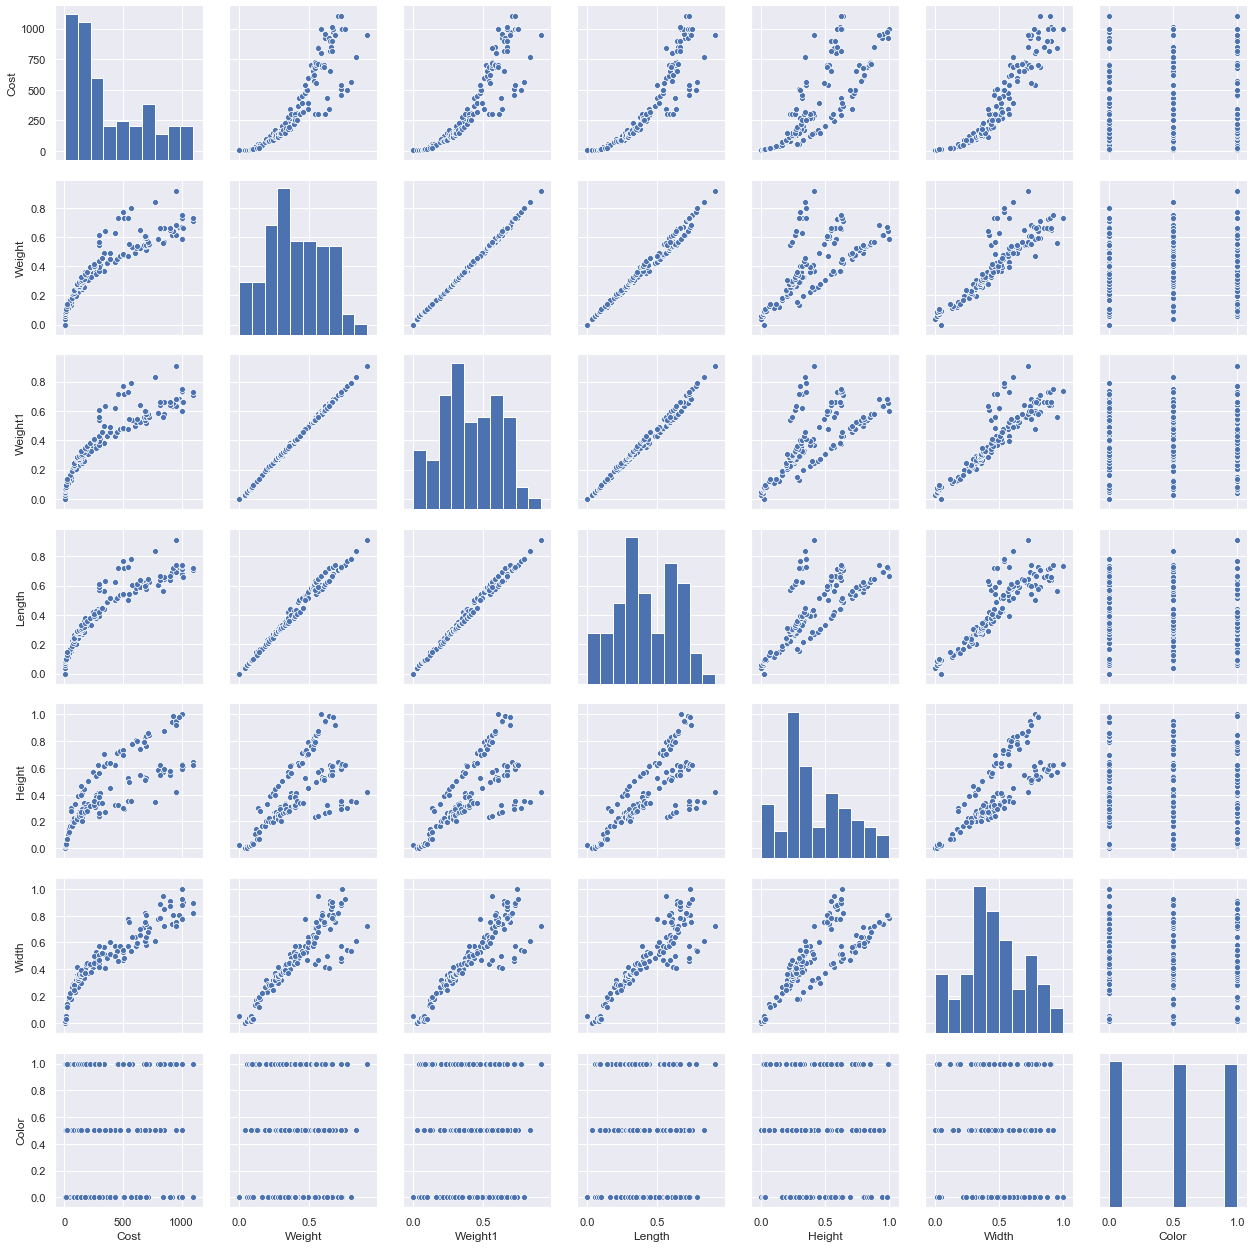

In [34]:
sns.pairplot(df)
plt.show()

# Generating the correlation between the attributes:

,Cost,Weight,Weight1,Length,Height,Width,Color
Cost,1.000000,0.893123,0.897111,0.905171,0.816912,0.927182,-0.012563
Weight,0.893123,1.000000,0.999411,0.990813,0.691774,0.892948,-0.013033
Weight1,0.897111,0.999411,1.000000,0.993301,0.707708,0.899411,-0.015901
Length,0.905171,0.990813,0.993301,1.000000,0.768947,0.900026,-0.014149
Height,0.816912,0.691774,0.707708,0.768947,1.000000,0.803824,-0.017469
Width,0.927182,0.892948,0.899411,0.900026,0.803824,1.000000,-0.006940
Color,-0.012563,-0.013033,-0.015901,-0.014149,-0.017469,-0.006940,1.000000


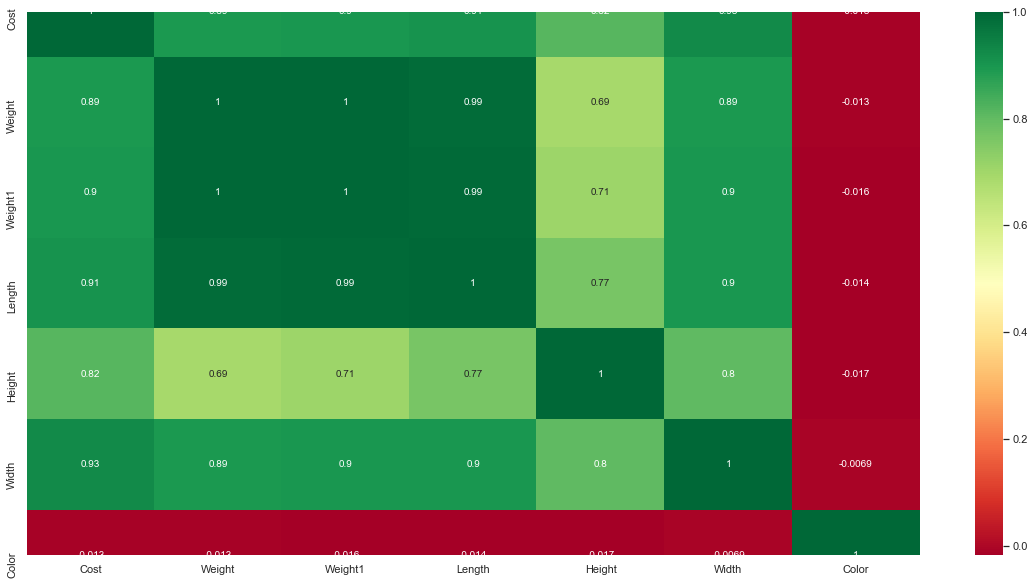

In [35]:
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap=plt.cm.RdYlGn, annot=True)
c

# Building Regression Models- OLS Approch
Generating the data required for the Model:

# Training and Testing Data

In [36]:
y = df['Cost']
X = df[['Weight','Weight1','Length','Height','Width']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_train

array([[ 9.56298313e-01,  9.33465242e-01,  8.35235204e-01,
         4.86567295e-01,  1.47091010e+00],
       [ 1.60189083e+00,  1.60850748e+00,  1.42410018e+00,
         7.33989077e-01,  1.71343212e+00],
       [ 6.78025675e-01,  7.25759937e-01,  9.01719959e-01,
         1.57846470e+00,  5.41261906e-01],
       [-3.79410348e-01, -3.64692914e-01, -2.85507809e-01,
        -3.00675277e-01, -3.06802159e-01],
       [-1.01387196e+00, -1.01896462e+00, -9.88346647e-01,
        -3.31067837e-01, -9.88939371e-01],
       [-1.67923143e-01, -1.05061282e-01,  8.49072548e-02,
         8.38669333e-01,  1.98491186e-01],
       [-6.24290269e-01, -6.24324545e-01, -5.79940295e-01,
         2.17315562e-01, -7.04803573e-01],
       [ 4.55407565e-01,  4.92091469e-01,  6.73772227e-01,
         1.19978093e+00,  4.19590039e-01],
       [ 8.11596541e-01,  7.77686263e-01,  8.16239559e-01,
        -6.76583252e-01,  1.55431828e-02],
       [ 1.01195284e+00,  9.85391568e-01,  8.73226492e-01,
         4.75746414e-01

Training the Model
Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [37]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Print out the coefficients of the model

In [38]:
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)


Coefficients: 
 [1240.32959163 -783.62676667 -377.0136936   159.59735886  101.97255752]
Intercept: 
 371.8603448275867


# predictions = lm.predict( X_test)

In [39]:
predictions = lm.predict( X_test)

# ** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

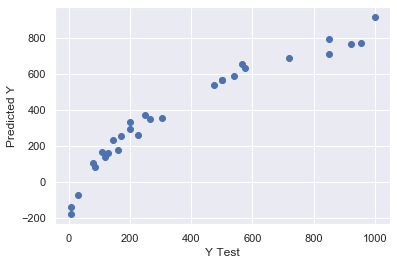

In [40]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [41]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:',metrics.explained_variance_score(y_test, predictions))

MAE: 80.02266883998428
MSE: 8769.9684988872
RMSE: 93.64810995896927
R2: 0.9078401463009032


# Residuals
You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

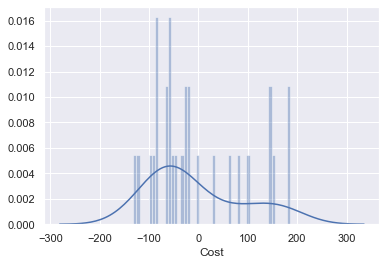

In [42]:
sns.distplot((y_test-predictions),bins=50);

# Conclusion- OLS
Since R2 is approching to 1, we can say this is good model

In [43]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Weight,1240.329592
Weight1,-783.626767
Length,-377.013694
Height,159.597359
Width,101.972558


# Training SGD(Stochastic Gradient ) Model

In [44]:
from sklearn.linear_model import SGDRegressor
clf_ = SGDRegressor()
clf_.fit(X_train, y_train)
print(clf_.intercept_)

[371.93456062]


In [45]:
coeff_df1 = pd.DataFrame(clf_.coef_,X.columns,columns=['Coefficient'])
coeff_df1

,Coefficient
Weight,55.289947
Weight1,48.611617
Length,32.168395
Height,63.872965
Width,119.133172


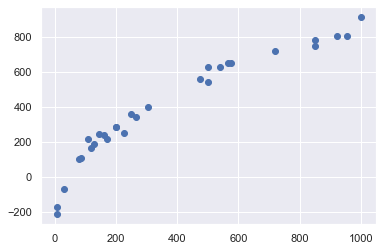

In [46]:
predictions_sgd=clf_.predict(X_test)
plt.scatter(y_test,predictions_sgd)

In [47]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_sgd))
print('MSE:', metrics.mean_squared_error(y_test, predictions_sgd))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_sgd)))
print('r2:', metrics.r2_score(y_test, predictions_sgd))

MAE: 85.79368709995893
MSE: 9424.215016507469
RMSE: 97.07839623988166
r2: 0.9006875106320015


# Conclusion Stochastic Gradient 
Since R2 is approching to 1, we can say this is good model

# Gradient Descent Algo

In [48]:
data = np.hstack((np.ones((df.shape[0], 1)), df))
print(data)

[[1.00000000e+00 2.42000000e+02 3.52808989e-01 ... 5.68334049e-01
  4.18978349e-01 0.00000000e+00]
 [1.00000000e+00 2.90000000e+02 3.70786517e-01 ... 6.24055350e-01
  4.59235453e-01 5.00000000e-01]
 [1.00000000e+00 3.40000000e+02 3.68539326e-01 ... 6.18123353e-01
  5.14278868e-01 1.00000000e+00]
 ...
 [1.00000000e+00 1.22000000e+01 1.03370787e-01 ... 3.18424016e-02
  2.93470907e-02 0.00000000e+00]
 [1.00000000e+00 1.97000000e+01 1.28089888e-01 ... 6.64244338e-02
  1.43718990e-01 5.00000000e-01]
 [1.00000000e+00 1.99000000e+01 1.41573034e-01 ... 6.98721893e-02
  1.17219215e-01 1.00000000e+00]]


In [49]:
split_factor = 0.90
split = int(split_factor * data.shape[0])
  
X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))
X_test = data[split:, :-1]
y_test = data[split:, -1].reshape((-1, 1))

print("Number of examples in training set = % d"%(X_train.shape[0]))
print("Number of examples in testing set = % d"%(X_test.shape[0]))

Number of examples in training set =  130
Number of examples in testing set =  15


# linear regression using "mini-batch" gradient descent
# function to compute hypothesis / predictions

In [50]:
def hypothesis(X, theta):
    return np.dot(X, theta)

# function to compute gradient of error function w.r.t. theta

In [51]:
def gradient(X, y, theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.transpose(), (h - y))
    return grad

# function to compute the error for current values of theta

In [52]:
def cost(X, y, theta):
    h = hypothesis(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]

# function to create a list containing mini-batches

In [53]:
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
  
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

# function to perform mini-batch gradient descent

In [54]:


def gradientDescent(X, y,learning_rate,batch_size,max_iters):
    theta = np.zeros((X.shape[1], 1))
    error_list = []
   
    for itr in range(max_iters):
        mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
            error_list.append(cost(X_mini, y_mini, theta))
  
    return theta, error_list

# For Learning rate One

Calling the gradientDescent() function to compute the model parameters (theta) and visualizing the change in error function.

Bias =  [1.5671729e+164]
Coefficients =  [[1.12786518e+167]
 [8.76680073e+163]
 [8.83043250e+163]
 [9.38348730e+163]
 [1.10036825e+164]
 [1.10771496e+164]]


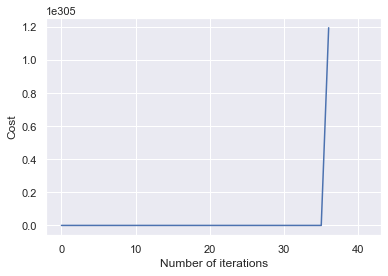

In [55]:
learning_rate =  0.01
batch_size = 10
max_iters = 3
theta, error_list = gradientDescent(X_train, y_train,learning_rate,batch_size,max_iters)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])
  
# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

Finally, we make predictions on the testing set and compute the mean absolute error in predictions.

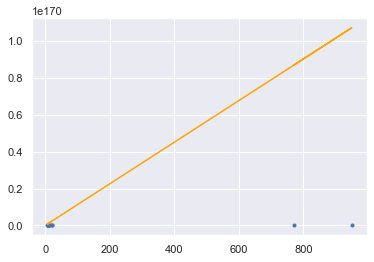

Mean absolute error =  1.4036887457307603e+169


In [56]:
y_pred = hypothesis(X_test, theta)
plt.scatter(X_test[:, 1], y_test[:, ], marker = '.')
plt.plot(X_test[:, 1], y_pred, color = 'orange')
plt.show()
  
# calculating error in predictions
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0])
print("Mean absolute error = ", error)

# For Learning Rate Two

Bias =  [2.00218933e+125]
Coefficients =  [[1.38489548e+128]
 [1.14294930e+125]
 [1.14190658e+125]
 [1.18595504e+125]
 [1.23425539e+125]
 [1.41612589e+125]]


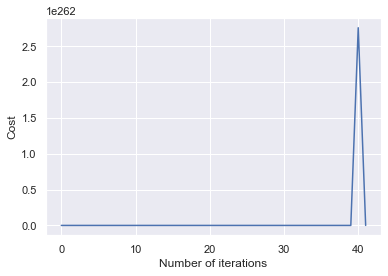

In [57]:
learning_rate =  0.001
batch_size = 10
max_iters = 3
theta, error_list = gradientDescent(X_train, y_train,learning_rate,batch_size,max_iters)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])
  
# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

Finally, we make predictions on the testing set and compute the mean absolute error in predictions.

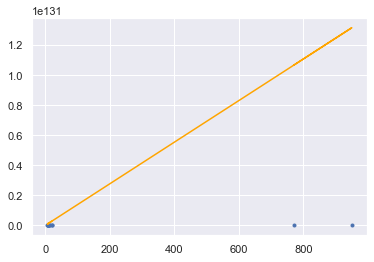

Mean absolute error =  1.7235778065525523e+130


In [58]:
y_pred = hypothesis(X_test, theta)
plt.scatter(X_test[:, 1], y_test[:, ], marker = '.')
plt.plot(X_test[:, 1], y_pred, color = 'orange')
plt.show()
  
# calculating error in predictions
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0])
print("Mean absolute error = ", error)

# Gradient Descent Helper Function

In [59]:
X = df.iloc[:,1:].values
y = df.iloc[:,0:1].values

#Helper Functions
def f(x,w,b):
    '''Sigmoid Function'''
    f = 1/(1+np.exp(-(w*x+b)))
    return f
def mse(x,y,w,b):
    '''Mean Squared Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += 0.5*(y[i]-f(x[i],w,b))**2
    return L
def cross_entropy(x,y,w,b):
    '''Cross Entropy Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += -(y[i]*np.log(f(x[i],w,b)))
    return L
def grad_w_mse(x,y,w,b):
    fx = f(x,w,b) 
    dw = (fx - y)*fx*(1-fx)*x
    return dw
def grad_b_mse(x,y,w,b):
    fx = f(x,w,b) 
    db = (fx - y)*fx*(1-fx)
    return db
def grad_w_cross(x,y,w,b):
    fx = f(x,w,b) 
    dw = (- y)*(1-fx)*x
    return dw
def grad_b_cross(x,y,w,b):
    fx = f(x,w,b) 
    db = (- y)*(1-fx)
    return db

# Gradient Descent

In [60]:
#Gradient Discent
def GD(x,y,epochs,batch_size,loss,lr):
    w = np.random.randn()
    b = np.random.randn()
    l_list = []
    w_list = []
    b_list = []
    points = 0
    ep = [i for i in range(epochs+1)]
    dw,db = 0,0
    for i in range(epochs+1):
        dw,db = 0,0
        for j in range(x.shape[0]):
            if (loss == 'mse'):
                dw += grad_w_mse(x[j],y[j],w,b)
                db += grad_b_mse(x[j],y[j],w,b)
            elif (loss == 'cross_entropy'):
                dw += grad_w_cross(x[j],y[j],w,b)
                db += grad_b_cross(x[j],y[j],w,b)
            points += 1
            if(points % batch_size == 0):
                w = w - lr*dw
                b = b - lr*db
                dw,db = 0,0
        if (loss == 'mse'):
            print('Loss after {}th epoch = {}\n'.format(i,mse(x,y,w,b)[0]))
            l_list.append(mse(x,y,w,b)[0])
        elif (loss == 'cross_entropy'):
            print('Loss after {}th epoch = {}\n'.format(i,cross_entropy(x,y,w,b)[0]))
            l_list.append(cross_entropy(x,y,w,b)[0])
        w_list.append(w[0])
        b_list.append(b[0])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch Curve\nAlgotithm :Mini Batch Gradient Decent\nBatch Size = {}\nLearning Rate = {}\nLoss Function = {}'.format(batch_size,lr,loss))
    plt.plot(ep,l_list)
    plt.show()
    return w_list,b_list

Loss after 0th epoch = 17326955.439128812

Loss after 1th epoch = 17326955.085844677

Loss after 2th epoch = 17326954.776336554

Loss after 3th epoch = 17326954.50156296

Loss after 4th epoch = 17326954.257220883

Loss after 5th epoch = 17326954.03738058

Loss after 6th epoch = 17326953.83956571

Loss after 7th epoch = 17326953.659665845

Loss after 8th epoch = 17326953.496231023

Loss after 9th epoch = 17326953.346281745

Loss after 10th epoch = 17326953.208971336

Loss after 11th epoch = 17326953.08205944

Loss after 12th epoch = 17326952.965066273

Loss after 13th epoch = 17326952.856255107

Loss after 14th epoch = 17326952.755375285

Loss after 15th epoch = 17326952.66104546

Loss after 16th epoch = 17326952.573160585

Loss after 17th epoch = 17326952.4905979

Loss after 18th epoch = 17326952.41334594

Loss after 19th epoch = 17326952.340474963

Loss after 20th epoch = 17326952.272033926

Loss after 21th epoch = 17326952.207240496

Loss after 22th epoch = 17326952.146182444

Loss a


Loss after 194th epoch = 17326950.348174043

Loss after 195th epoch = 17326950.34633333

Loss after 196th epoch = 17326950.344517656

Loss after 197th epoch = 17326950.342711516

Loss after 198th epoch = 17326950.3409298

Loss after 199th epoch = 17326950.33915728

Loss after 200th epoch = 17326950.337408565

Loss after 201th epoch = 17326950.33566873

Loss after 202th epoch = 17326950.333952125

Loss after 203th epoch = 17326950.332244057

Loss after 204th epoch = 17326950.330558684

Loss after 205th epoch = 17326950.32888155

Loss after 206th epoch = 17326950.32722653

Loss after 207th epoch = 17326950.32557948

Loss after 208th epoch = 17326950.323954035

Loss after 209th epoch = 17326950.322336275

Loss after 210th epoch = 17326950.320739612

Loss after 211th epoch = 17326950.31915034

Loss after 212th epoch = 17326950.3175817

Loss after 213th epoch = 17326950.316020194

Loss after 214th epoch = 17326950.314478837

Loss after 215th epoch = 17326950.312944368

Loss after 216th epo

Loss after 394th epoch = 17326950.159281906

Loss after 395th epoch = 17326950.158798352

Loss after 396th epoch = 17326950.158319354

Loss after 397th epoch = 17326950.157840468

Loss after 398th epoch = 17326950.157366097

Loss after 399th epoch = 17326950.156891815

Loss after 400th epoch = 17326950.156421997

Loss after 401th epoch = 17326950.15595226

Loss after 402th epoch = 17326950.15548692

Loss after 403th epoch = 17326950.155021656

Loss after 404th epoch = 17326950.15456075

Loss after 405th epoch = 17326950.154099908

Loss after 406th epoch = 17326950.153643355

Loss after 407th epoch = 17326950.153186854

Loss after 408th epoch = 17326950.1527346

Loss after 409th epoch = 17326950.15228238

Loss after 410th epoch = 17326950.151834376

Loss after 411th epoch = 17326950.1513864

Loss after 412th epoch = 17326950.150942534

Loss after 413th epoch = 17326950.15049872

Loss after 414th epoch = 17326950.150059022

Loss after 415th epoch = 17326950.149619307

Loss after 416th ep

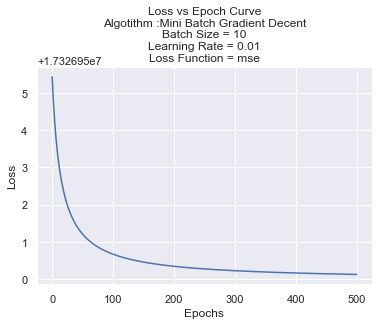

array([17341088.18884781, 17341091.45502203, 17341243.77159668,
       17341300.98904805, 17341695.20018056, 17340797.33828371])

In [61]:
x = df.iloc[:,1:].values
y = df.iloc[:,0:1].values
W,B = GD(x,y,500,10,'mse',0.01)
w = np.random.randn()
b = np.random.randn()
mse(x,y,w,b)

# GD with Second Learning Rate

Loss after 0th epoch = 17327778.05551504

Loss after 1th epoch = 17327358.753306612

Loss after 2th epoch = 17327222.192784492

Loss after 3th epoch = 17327154.046145353

Loss after 4th epoch = 17327113.388514124

Loss after 5th epoch = 17327086.19168969

Loss after 6th epoch = 17327066.850488562

Loss after 7th epoch = 17327052.279013567

Loss after 8th epoch = 17327040.994160246

Loss after 9th epoch = 17327031.921479188

Loss after 10th epoch = 17327024.530908234

Loss after 11th epoch = 17327018.340089597

Loss after 12th epoch = 17327013.1253951

Loss after 13th epoch = 17327008.631745256

Loss after 14th epoch = 17327004.755405966

Loss after 15th epoch = 17327001.34508382

Loss after 16th epoch = 17326998.350396402

Loss after 17th epoch = 17326995.673674494

Loss after 18th epoch = 17326993.29047356

Loss after 19th epoch = 17326991.133523334

Loss after 20th epoch = 17326989.19178984

Loss after 21th epoch = 17326987.41652777

Loss after 22th epoch = 17326985.80392843

Loss af

Loss after 201th epoch = 17326954.110133827

Loss after 202th epoch = 17326954.089923486

Loss after 203th epoch = 17326954.069763266

Loss after 204th epoch = 17326954.049944848

Loss after 205th epoch = 17326954.030173533

Loss after 206th epoch = 17326954.01073574

Loss after 207th epoch = 17326953.991342127

Loss after 208th epoch = 17326953.972274087

Loss after 209th epoch = 17326953.953247495

Loss after 210th epoch = 17326953.934538733

Loss after 211th epoch = 17326953.91586879

Loss after 212th epoch = 17326953.89750924

Loss after 213th epoch = 17326953.879186008

Loss after 214th epoch = 17326953.861165985

Loss after 215th epoch = 17326953.843179885

Loss after 216th epoch = 17326953.82549004

Loss after 217th epoch = 17326953.807831824

Loss after 218th epoch = 17326953.790463146

Loss after 219th epoch = 17326953.77312393

Loss after 220th epoch = 17326953.756067753

Loss after 221th epoch = 17326953.73903894

Loss after 222th epoch = 17326953.722286876

Loss after 223th

Loss after 410th epoch = 17326952.011061225

Loss after 411th epoch = 17326952.00610168

Loss after 412th epoch = 17326952.001205333

Loss after 413th epoch = 17326951.996293448

Loss after 414th epoch = 17326951.991444066

Loss after 415th epoch = 17326951.986579135

Loss after 416th epoch = 17326951.98177604

Loss after 417th epoch = 17326951.976957433

Loss after 418th epoch = 17326951.97219997

Loss after 419th epoch = 17326951.967427008

Loss after 420th epoch = 17326951.96271453

Loss after 421th epoch = 17326951.95798656

Loss after 422th epoch = 17326951.95331843

Loss after 423th epoch = 17326951.948634822

Loss after 424th epoch = 17326951.94401041

Loss after 425th epoch = 17326951.93937055

Loss after 426th epoch = 17326951.93478925

Loss after 427th epoch = 17326951.930192523

Loss after 428th epoch = 17326951.925653715

Loss after 429th epoch = 17326951.92109954

Loss after 430th epoch = 17326951.91660265

Loss after 431th epoch = 17326951.912090406

Loss after 432th epoc

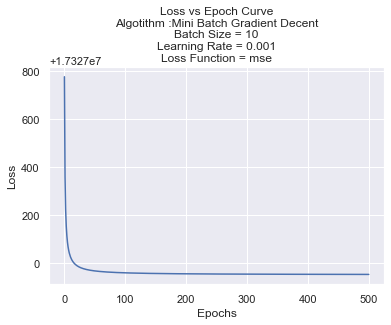

In [62]:
x = df.iloc[:,1:].values
y = df.iloc[:,0:1].values
W,B = GD(x,y,500,10,'mse',0.001)

In [63]:
print('Weight list = \n{}'.format(W))
print('\n\nBias list = \n{}'.format(B))

Weight list = 
[2.7259313660699256, 3.005065669707471, 3.164606781483654, 3.2767150270573095, 3.3630613388241746, 3.433366516680384, 3.4925397723236986, 3.5437138461917317, 3.588690872629572, 3.6288932155101903, 3.6651477382115125, 3.698236996202864, 3.7285902524372734, 3.7566952855610696, 3.7827914057662313, 3.807210646374987, 3.83009138868042, 3.8516749298496067, 3.8720418117667514, 3.8913764301254634, 3.909724279333043, 3.9272319538020306, 3.943922800206127, 3.9599171062573677, 3.975223770436927, 3.9899440589502033, 4.00407721807857, 4.017710312064312, 4.030836028176638, 4.043530534322925, 4.055782011821584, 4.0676580705777745, 4.079143781541361, 4.0902998954575915, 4.101109340600343, 4.111627271924704, 4.121835157195747, 4.131783514615811, 4.141452838915569, 4.150889752967603, 4.160074130666988, 4.169049282165213, 4.177794717174595, 4.186350897692378, 4.194697157441796, 4.202871485636899, 4.210853178535532, 4.218678059525857, 4.226325489490422, 4.233829379756188, 4.241169230941424,

Loss after 0th epoch = 4.882871884603911e-12

Loss after 1th epoch = 4.882871884603911e-12

Loss after 2th epoch = 4.882871884603911e-12

Loss after 3th epoch = 4.882871884603911e-12

Loss after 4th epoch = 4.882871884603911e-12

Loss after 5th epoch = 4.882871884603911e-12

Loss after 6th epoch = 4.882871884603911e-12

Loss after 7th epoch = 4.882871884603911e-12

Loss after 8th epoch = 4.882871884603911e-12

Loss after 9th epoch = 4.882871884603911e-12

Loss after 10th epoch = 4.882871884603911e-12

Loss after 11th epoch = 4.882871884603911e-12

Loss after 12th epoch = 4.882871884603911e-12

Loss after 13th epoch = 4.882871884603911e-12

Loss after 14th epoch = 4.882871884603911e-12

Loss after 15th epoch = 4.882871884603911e-12

Loss after 16th epoch = 4.882871884603911e-12

Loss after 17th epoch = 4.882871884603911e-12

Loss after 18th epoch = 4.882871884603911e-12

Loss after 19th epoch = 4.882871884603911e-12

Loss after 20th epoch = 4.882871884603911e-12

Loss after 21th epoch =

Loss after 191th epoch = 4.882871884603911e-12

Loss after 192th epoch = 4.882871884603911e-12

Loss after 193th epoch = 4.882871884603911e-12

Loss after 194th epoch = 4.882871884603911e-12

Loss after 195th epoch = 4.882871884603911e-12

Loss after 196th epoch = 4.882871884603911e-12

Loss after 197th epoch = 4.882871884603911e-12

Loss after 198th epoch = 4.882871884603911e-12

Loss after 199th epoch = 4.882871884603911e-12

Loss after 200th epoch = 4.882871884603911e-12

Loss after 201th epoch = 4.882871884603911e-12

Loss after 202th epoch = 4.882871884603911e-12

Loss after 203th epoch = 4.882871884603911e-12

Loss after 204th epoch = 4.882871884603911e-12

Loss after 205th epoch = 4.882871884603911e-12

Loss after 206th epoch = 4.882871884603911e-12

Loss after 207th epoch = 4.882871884603911e-12

Loss after 208th epoch = 4.882871884603911e-12

Loss after 209th epoch = 4.882871884603911e-12

Loss after 210th epoch = 4.882871884603911e-12

Loss after 211th epoch = 4.8828718846039

Loss after 390th epoch = 4.882871884603911e-12

Loss after 391th epoch = 4.882871884603911e-12

Loss after 392th epoch = 4.882871884603911e-12

Loss after 393th epoch = 4.882871884603911e-12

Loss after 394th epoch = 4.882871884603911e-12

Loss after 395th epoch = 4.882871884603911e-12

Loss after 396th epoch = 4.882871884603911e-12

Loss after 397th epoch = 4.882871884603911e-12

Loss after 398th epoch = 4.882871884603911e-12

Loss after 399th epoch = 4.882871884603911e-12

Loss after 400th epoch = 4.882871884603911e-12

Loss after 401th epoch = 4.882871884603911e-12

Loss after 402th epoch = 4.882871884603911e-12

Loss after 403th epoch = 4.882871884603911e-12

Loss after 404th epoch = 4.882871884603911e-12

Loss after 405th epoch = 4.882871884603911e-12

Loss after 406th epoch = 4.882871884603911e-12

Loss after 407th epoch = 4.882871884603911e-12

Loss after 408th epoch = 4.882871884603911e-12

Loss after 409th epoch = 4.882871884603911e-12

Loss after 410th epoch = 4.8828718846039

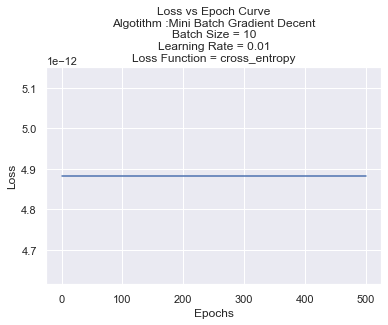

In [64]:
W,B = GD(x,y,500,10,'cross_entropy',0.01)

In [65]:
print('Weight list = \n{}'.format(W))
print('Bias list = \n{}'.format(B))

Weight list = 
[15.756656037058393, 15.756656037058402, 15.756656037058411, 15.75665603705842, 15.756656037058429, 15.756656037058438, 15.756656037058447, 15.756656037058455, 15.756656037058464, 15.756656037058473, 15.756656037058482, 15.756656037058491, 15.7566560370585, 15.756656037058509, 15.756656037058518, 15.756656037058526, 15.756656037058535, 15.756656037058544, 15.756656037058553, 15.756656037058562, 15.75665603705857, 15.75665603705858, 15.756656037058589, 15.756656037058598, 15.756656037058606, 15.756656037058615, 15.756656037058624, 15.756656037058633, 15.756656037058642, 15.75665603705865, 15.75665603705866, 15.756656037058669, 15.756656037058677, 15.756656037058686, 15.756656037058695, 15.756656037058704, 15.756656037058713, 15.756656037058722, 15.75665603705873, 15.75665603705874, 15.756656037058749, 15.756656037058757, 15.756656037058766, 15.756656037058775, 15.756656037058784, 15.756656037058793, 15.756656037058802, 15.75665603705881, 15.75665603705882, 15.756656037058

In [66]:
X = df.iloc[:,1:].values
y = df.iloc[:,0:1].values
# Splitting the dataset by train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
learning_rate = 0.5
max_iteration = 5000

s_learning_rate = 0.05
s_max_iteration = 1000

mb_learning_rate = 0.05
mb_max_iteration = 10000
batch_size = 30
theta = np.zeros((df.shape[1], 1))
s_theta = np.zeros((df.shape[1], 1))
mb_theta = np.zeros((df.shape[1], 1))
class GradientDescent:
    ''' Gradient Descent class which contains batch, mini-batch and stochastic gradient '''
    
    def __init__(self):
        ''' Constructor of Gradient Descent'''
        print('GradientDescent Class initiated')
        
    def get_metrics(self, x, y, theta):
        ''' To calculate the metrics like MAE, MSE, RMSE, R2 '''
        y_pred = [(theta[1] * x1) + (theta[2] * x2)+ (theta[3] * x3)+ (theta[4] * x4) +(theta[5] * x5)+(theta[6] * x6)+ theta[0]
                       for x1,x2,x3,x4,x5,x6 in x]
        mae = mean_absolute_error(y,y_pred)
        mse = mean_squared_error(y,y_pred)
        metrics = "MAE = {0}, MSE = {1}, RMSE = {2}, R2 = {3}".format(mae, mse, math.sqrt(mse), r2_score(y,y_pred))
        return metrics
    
    def h (self, theta, X) :
        ''' hypotheseis function to calculate the equation '''
        tempX = np.ones((X.shape[0], X.shape[1] + 1))
        tempX[:,1:] = X
        res = np.matmul(tempX, theta)
        return res
    
    def loss (self, theta, X, Y) :
        ''' Loss function to find the difference between actual and predicted values '''
        return np.average(np.square(Y - self.h(theta, X))) / 2
    
    def gradient(self, theta, X, Y):
        tempX = np.ones((X.shape[0], X.shape[1] + 1))
        tempX[:,1:] = X
        d_theta = - np.average((Y - self.h(theta, X)) * tempX, axis= 0)
        d_theta = d_theta.reshape((d_theta.shape[0], 1))
        return d_theta
    
    def batch_gradient_descent (self, theta, X, Y, learning_rate, max_iteration, gap):
        ''' Gradient or Batch function to calculate the gradient for the whole dataset '''
        cost = np.zeros(max_iteration)
        for i in range(max_iteration):
            d_theta = self.gradient (theta, X, Y)
            theta = theta - learning_rate * d_theta
            cost[i] = self.loss(theta, X, Y)
            if i % gap == 0 :
                print ('iteration : ', i, ' loss : ', self.loss(theta, X, Y))
        return theta, cost

    def minibatch_gradient_descent (self, theta, X, Y, learning_rate, max_iteration, batch_size, gap):
        ''' Mini Batch Gradient Function to calculate the gradient by splitting the dataset by multiple batches '''
        cost = np.zeros(max_iteration)
        for i in range(max_iteration) :
            for j in range(0, X.shape[0], batch_size):
                d_theta = self.gradient(theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
                theta = theta - learning_rate * d_theta
            cost[i] = self.loss(theta, X, Y)
            if i % gap == 0 :
                print ('iteration : ', i, ' loss : ', self.loss(theta, X, Y)) 
        return theta, cost
    
    def stochastic_gradient_descent (self, theta, X, Y, learning_rate, max_iteration, gap):
        ''' Stochastic Gradient Function to calculate the gradient for all rows by looping the dataset '''
        cost = np.zeros(max_iteration)
        for i in range(max_iteration) :
            for j in range(X.shape[0]):
                d_theta = self.gradient(theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
                theta = theta - learning_rate * d_theta    
            cost[i] = self.loss(theta, X, Y)
            if i % gap == 0 :
                print ('iteration : ', i, ' loss : ', self.loss(theta, X, Y))
        return theta, cost

GradientDescent Class initiated
iteration :  0  loss :  26421.176863123666
iteration :  1000  loss :  5033.623209329279
iteration :  2000  loss :  5000.849146762821
iteration :  3000  loss :  4971.09964185609
iteration :  4000  loss :  4943.387186060922
[[-243.09738777]
 [ 630.83420028]
 [ 221.63974334]
 [-241.80862935]
 [ 327.18790927]
 [ 499.94600802]
 [   1.79861664]]


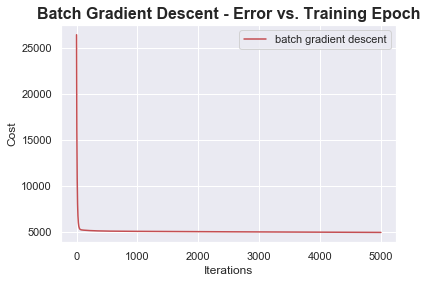

Batch Gradient Descent
MAE = 80.9183201169809, MSE = 9835.156244283506, RMSE = 99.1723562505374, R2 = 0.8989583871624942
MAE = 86.69535991764847, MSE = 10923.981432614979, RMSE = 104.51785221968053, R2 = 0.8987592392566043


In [67]:
gradient_obj = GradientDescent()

theta, cost = gradient_obj.batch_gradient_descent(theta, X_train, y_train, learning_rate, max_iteration, 1000)
print(theta)

#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.legend(loc='upper right', labels=['batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Batch Gradient Descent - Error vs. Training Epoch', fontsize=16, fontweight='bold')
plt.show()

print('Batch Gradient Descent')
print(gradient_obj.get_metrics(X_train,y_train,theta ))
print(gradient_obj.get_metrics(X_test,y_test,theta ))

# Mini Gradient Descent

In [68]:
mb_theta, mb_cost = gradient_obj.minibatch_gradient_descent (mb_theta, X_train, y_train,mb_learning_rate, mb_max_iteration, batch_size, 1000)
print(theta)

iteration :  0  loss :  59615.96723199563
iteration :  1000  loss :  5066.714404035545
iteration :  2000  loss :  5043.870641510048
iteration :  3000  loss :  5032.209737636008
iteration :  4000  loss :  5020.392751240678
iteration :  5000  loss :  5008.410464075983
iteration :  6000  loss :  4996.579599278791
iteration :  7000  loss :  4985.020496552495
iteration :  8000  loss :  4973.765664842527
iteration :  9000  loss :  4962.818338118908
[[-243.09738777]
 [ 630.83420028]
 [ 221.63974334]
 [-241.80862935]
 [ 327.18790927]
 [ 499.94600802]
 [   1.79861664]]


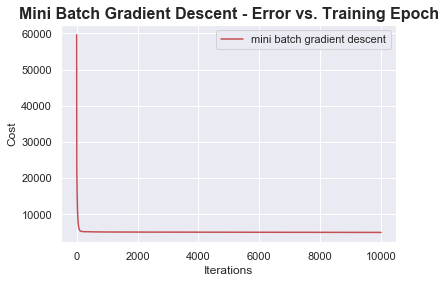

In [69]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(mb_max_iteration), mb_cost, 'r')  
ax.legend(loc='upper right', labels=['mini batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Mini Batch Gradient Descent - Error vs. Training Epoch', fontsize=16, fontweight='bold')
plt.show()

In [70]:
print('Mini Batch Gradient Descent')
print(gradient_obj.get_metrics(X_train,y_train,mb_theta ))
print(gradient_obj.get_metrics(X_test,y_test,mb_theta ))

Mini Batch Gradient Descent
MAE = 81.32102406434467, MSE = 9904.36654120561, RMSE = 99.52068398682563, R2 = 0.8982473542259268
MAE = 87.23764455635278, MSE = 10929.806104192878, RMSE = 104.5457129881129, R2 = 0.8987052576396212


# Stochastic Gradient Descent

In [71]:
s_theta, s_cost = gradient_obj.stochastic_gradient_descent(s_theta, X_train, y_train, s_learning_rate, s_max_iteration, 1000)

iteration :  0  loss :  11710.735579363767


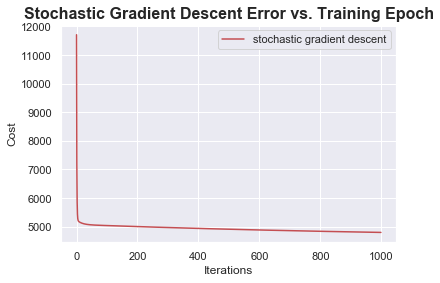

In [72]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(s_max_iteration), s_cost, 'r')  
ax.legend(loc='upper right', labels=['stochastic gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Stochastic Gradient Descent Error vs. Training Epoch', fontsize=16, fontweight='bold')
plt.show()

In [73]:
print('Stochastic Gradient Descent')
print(gradient_obj.get_metrics(X_train,y_train,s_theta ))
print(gradient_obj.get_metrics(X_test,y_test,s_theta ))

Stochastic Gradient Descent
MAE = 79.02580224600307, MSE = 9600.783110022734, RMSE = 97.98358592143244, R2 = 0.901366222778248
MAE = 84.51040096710177, MSE = 10837.708470621968, RMSE = 104.10431533141154, R2 = 0.8995587957514259


# sklearn SGDRegressor

In [74]:
sgd_regressor = SGDRegressor(max_iter=10000, tol=0.005)
sgd_regressor.fit(X_train, y_train.ravel())
print(sgd_regressor.coef_)
print(sgd_regressor.intercept_)

y_pred = sgd_regressor.predict(X_test)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print('sklearn SGDRegressor')
print("MAE = {0}, MSE = {1}, RMSE = {2}, R2 = {3}".format(MAE, MSE, math.sqrt(MSE), sgd_regressor.score(X_train, y_train)))

[260.47194731 255.49337522 248.93090511 301.55007515 364.76722919
  -1.31378739]
[-238.58676925]
sklearn SGDRegressor
MAE = 93.63692101265083, MSE = 12391.052638120807, RMSE = 111.31510516601423, R2 = 0.8936243620682763


# sklearn linear regression
# with sklearn


In [75]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train.ravel())
print(regr.coef_)
print('Intercept: \n', regr.intercept_)

y_pred = regr.predict(X_test)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print('sklearn linear regression')
print("MAE = {0}, MSE = {1}, RMSE = {2}, R2 = {3}".format(MAE, MSE, math.sqrt(MSE), regr.score(X_test, y_test)))

[ 6.51236753e+03 -4.33962405e+03 -1.67872724e+03  6.60205953e+02
  3.73550978e+02 -1.39824002e+00]
Intercept: 
 -250.37861181564296
sklearn linear regression
MAE = 82.51449392593696, MSE = 10385.663647521611, RMSE = 101.91007628061914, R2 = 0.9037482354775093
